In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 25

In [20]:
df = pd.read_csv('movies.csv')

In [21]:
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118499 entries, 0 to 1118498
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1118499 non-null  int64  
 1   title                 1118486 non-null  object 
 2   vote_average          1118499 non-null  float64
 3   vote_count            1118499 non-null  int64  
 4   status                1118499 non-null  object 
 5   release_date          939750 non-null   object 
 6   revenue               1118499 non-null  int64  
 7   runtime               1118499 non-null  int64  
 8   adult                 1118499 non-null  bool   
 9   backdrop_path         298594 non-null   object 
 10  budget                1118499 non-null  int64  
 11  homepage              118848 non-null   object 
 12  imdb_id               597923 non-null   object 
 13  original_language     1118499 non-null  object 
 14  original_title        1118486 non-

In [23]:
# Check for missing values
missing_count = df.isnull().sum()
print(missing_count)

# Dropping rows with critical missing values (like title or release_date)
df = df.dropna(subset=['title', 'release_date', 'budget', 'revenue', 'production_companies'])

# Drop rows with zero revenue
df = df[df['revenue'] != 0]
df = df[df['budget'] != 0]

id                           0
title                       13
vote_average                 0
vote_count                   0
status                       0
release_date            178749
revenue                      0
runtime                      0
adult                        0
backdrop_path           819905
budget                       0
homepage                999651
imdb_id                 520576
original_language            0
original_title              13
overview                224548
popularity                   0
poster_path             348749
tagline                 961402
genres                  445365
production_companies    611555
production_countries    492098
spoken_languages        473656
keywords                813093
dtype: int64


In [24]:
#df['production_companies'] = df['production_companies'].astype(str)
#df['genres'] = df['genres'].astype(str)
df.duplicated().sum()

np.int64(0)

In [25]:
# Engineering new profit margin feature
df['profit_margin'] = (df['revenue'] - df['budget']) / df['budget'] * 100
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,profit_margin
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",415.957978
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",325.290428
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",443.004564


In [26]:
# Use IQR method to filter out outliers for revenue and budget
Q1_revenue = df['revenue'].quantile(0.25)
Q3_revenue = df['revenue'].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue
print(IQR_revenue)

Q1_budget = df['budget'].quantile(0.25)
Q3_budget = df['budget'].quantile(0.75)
IQR_budget = Q3_budget - Q1_budget
print(IQR_budget)

# Filter out outliers
df_cleaned = df[
    (df['revenue'] >= Q1_revenue - 1.5 * IQR_revenue) & (df['revenue'] <= Q3_revenue + 1.5 * IQR_revenue) &
    (df['budget'] >= Q1_budget - 1.5 * IQR_budget) & (df['budget'] <= Q3_budget + 1.5 * IQR_budget)
]

df_cleaned.head(3)

48784013.25
24193763.25


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,profit_margin
14,278,The Shawshank Redemption,8.702,24649,Released,1994-09-23,28341469,142,False,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,25000000,NaN,tt0111161,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,122.610,/lyQBXzOQSuE59IsHyhrp0qIiPAz.jpg,Fear can hold you prisoner. Hope can set you f...,"Drama, Crime",Castle Rock Entertainment,United States of America,English,"prison, friendship, police brutality, corrupti...",13.365876
63,245891,John Wick,7.421,17923,Released,2014-10-22,88761661,101,False,/7dzngS8pLkGJpyeskCFcjPO9qLF.jpg,20000000,https://www.lionsgate.com/movies/john-wick,tt2911666,en,John Wick,Ex-hitman John Wick comes out of retirement to...,55.739,/fZPSd91yGE9fCcCe6OoQr6E3Bev.jpg,Don't set him off.,"Action, Thriller","87Eleven, DefyNite Films, MJW Films, Thunder Road",United States of America,"Hungarian, English, Russian","hitman, bratva (russian mafia), gangster, secr...",343.808305
86,694,The Shining,8.218,16205,Released,1980-05-23,44781695,144,False,/AdKA2F1SzYPhSZdEbjH1Zh75UVQ.jpg,19000000,NaN,tt0081505,en,The Shining,Jack Torrance accepts a caretaker job at the O...,45.252,/xazWoLealQwEgqZ89MLZklLZD3k.jpg,"He came as the caretaker, but this hotel had i...","Horror, Thriller","Hawk Films, Peregrine, Producers Circle, Warne...","United Kingdom, United States of America",English,"hotel, child abuse, based on novel or book, is...",135.693132


**Questions**
1. Which production companies consistently produce the most profitable movies?
    - This question aims to identify the top production companies based on average profit margins, helping to understand what makes them successful.

In [27]:
# Split and explode the production_companies column, because there are multiple companies in a single cell
df['production_companies'] = df['production_companies'].str.split(', ')
df_exploded = df.explode('production_companies')
print(df_exploded.info())

# Group by production companies and calculate the average profit_margin
avg_profit_margin = df_exploded.groupby('production_companies')['profit_margin'].mean().reset_index()
print(avg_profit_margin.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31991 entries, 0 to 1118037
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    31991 non-null  int64  
 1   title                 31991 non-null  object 
 2   vote_average          31991 non-null  float64
 3   vote_count            31991 non-null  int64  
 4   status                31991 non-null  object 
 5   release_date          31991 non-null  object 
 6   revenue               31991 non-null  int64  
 7   runtime               31991 non-null  int64  
 8   adult                 31991 non-null  bool   
 9   backdrop_path         30352 non-null  object 
 10  budget                31991 non-null  int64  
 11  homepage              12809 non-null  object 
 12  imdb_id               30624 non-null  object 
 13  original_language     31991 non-null  object 
 14  original_title        31991 non-null  object 
 15  overview              

Text(0.5, 1.0, 'Distribution of Avg Profit Margin by Production Companies')

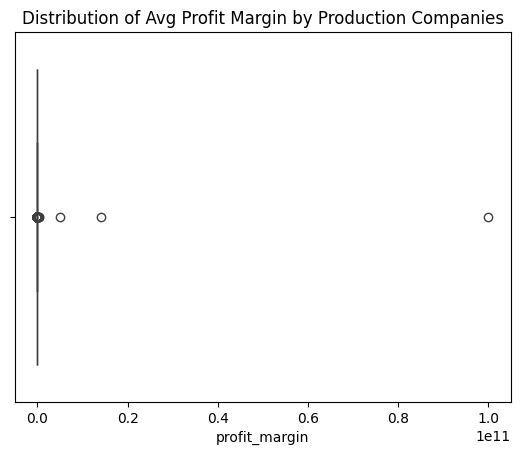

In [28]:
avg_profit_margin = avg_profit_margin.round(decimals = 0)
avg_profit_margin.head(10)
sns.boxplot(data=avg_profit_margin, x='profit_margin')
plt.title('Distribution of Avg Profit Margin by Production Companies')

C:\Users\jimmy\AppData\Local\Temp\ipykernel_27136\2999716685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['production_companies'] = df_cleaned['production_companies'].str.split(', ')


Text(0.5, 1.0, 'Distribution of Avg Profit Margin by Production Companies (Outliers Removed)')

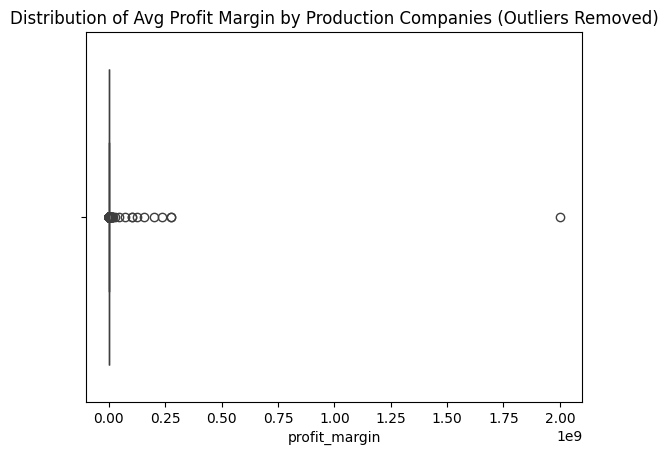

In [29]:
# Split and explode the production_companies column, because there are multiple companies in a single cell
df_cleaned['production_companies'] = df_cleaned['production_companies'].str.split(', ')
df_exploded = df_cleaned.explode('production_companies')

# Group by production companies and calculate the average profit_margin
avg_profit_margin = df_exploded.groupby('production_companies')['profit_margin'].mean().reset_index()

# Plot boxplot
sns.boxplot(data=avg_profit_margin, x='profit_margin')
plt.title('Distribution of Avg Profit Margin by Production Companies (Outliers Removed)')

2. What is the relationship between movie budgets and profit margins?
- Understanding how different budget levels impact profitability can guide future investments and production decisions. Are high-budget films
more successful, or do low-budget films offer better returns?

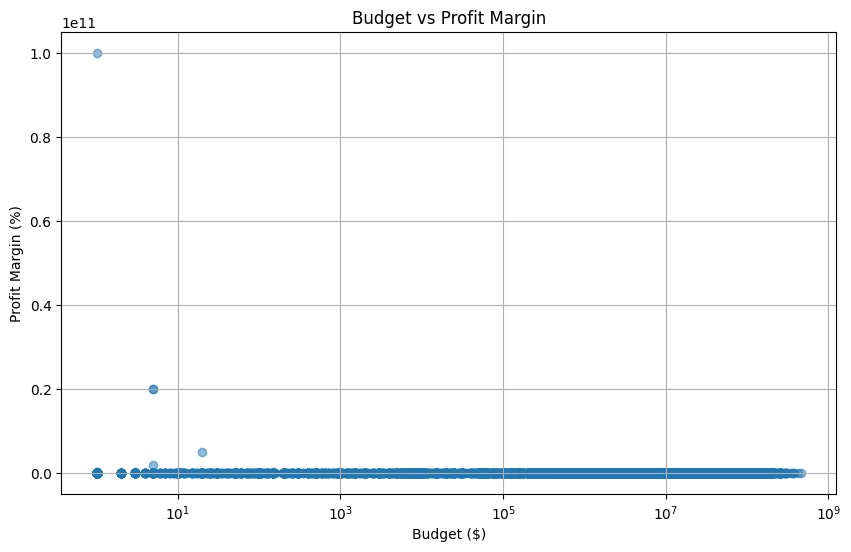

In [30]:
# Create a scatter plot to visualize the relationship between budget and profit margin
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['profit_margin'], alpha=0.5)
plt.title('Budget vs Profit Margin')
plt.xlabel('Budget ($)')
plt.ylabel('Profit Margin (%)')
plt.xscale('log')  # Optional: Use log scale for better visibility
plt.grid()
plt.show()

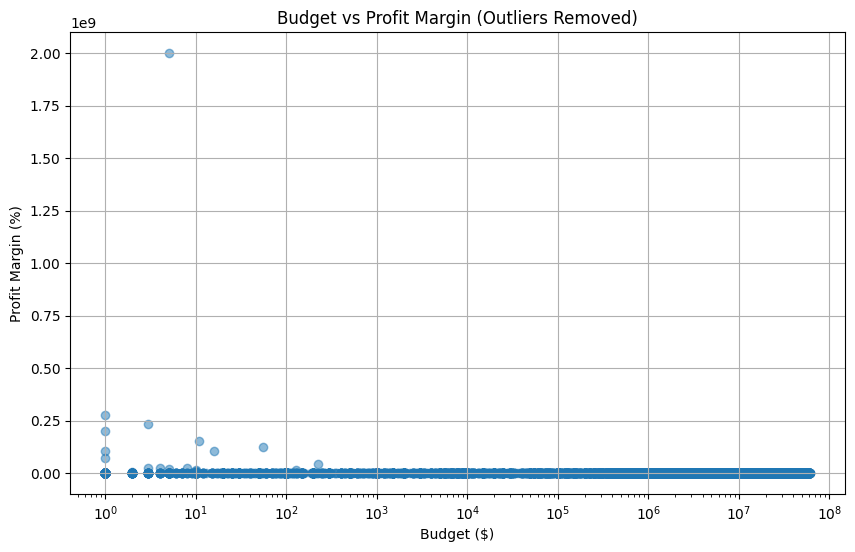

In [31]:
# Create a scatter plot to visualize the relationship between budget and profit margin (outliers removed)
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['budget'], df_cleaned['profit_margin'], alpha=0.5)
plt.title('Budget vs Profit Margin (Outliers Removed)')
plt.xlabel('Budget ($)')
plt.ylabel('Profit Margin (%)')
plt.xscale('log')  # Optional: Use log scale for better visibility
plt.grid()
plt.show()

3. How do factors like genre and average viewer ratings (vote_average) influence a movie's financial success?
- Analyzing the impact of genre and viewer ratings on revenue and profit margins can provide insights into audience preferences and what types of movies are likely to succeed.

In [32]:
df_cleaned['genres'] = df_cleaned['genres'].str.split(', ')
df_genre_exploded = df_cleaned.explode('genres')

genre_analysis = df_genre_exploded.groupby('genres').agg(
    avg_profit_margin=('profit_margin', 'mean'),
    avg_vote_average=('vote_average', 'mean')
).reset_index()

genre_analysis_sorted = genre_analysis.sort_values(by='avg_profit_margin', ascending=False)
print(genre_analysis_sorted)

             genres  avg_profit_margin  avg_vote_average
12          Mystery       2.632370e+06          5.854249
15         TV Movie       2.246762e+06          4.666043
0            Action       1.132910e+06          5.974919
3            Comedy       8.697391e+05          5.769010
18          Western       8.044862e+05          6.133224
6             Drama       5.852483e+05          6.090550
11            Music       5.759409e+05          6.095284
9           History       5.306853e+05          6.591863
10           Horror       4.626643e+05          5.515250
4             Crime       2.242303e+05          6.025026
13          Romance       2.201634e+05          6.083076
14  Science Fiction       1.432815e+05          5.764003
1         Adventure       4.456671e+04          5.887228
7            Family       4.220902e+04          5.835042
8           Fantasy       4.046954e+04          5.860715
16         Thriller       8.179651e+03          5.916814
5       Documentary       9.971

C:\Users\jimmy\AppData\Local\Temp\ipykernel_27136\2233911989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['genres'] = df_cleaned['genres'].str.split(', ')


4. What trends can be observed in movie profitability over time, especially concerning inflation?
- This question looks at how profit margins have changed over the years and how external economic factors, such as inflation, affect movie profitability.

C:\Users\jimmy\AppData\Local\Temp\ipykernel_27136\2063039483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['release_year'] = pd.to_datetime(df_cleaned['release_date']).dt.year


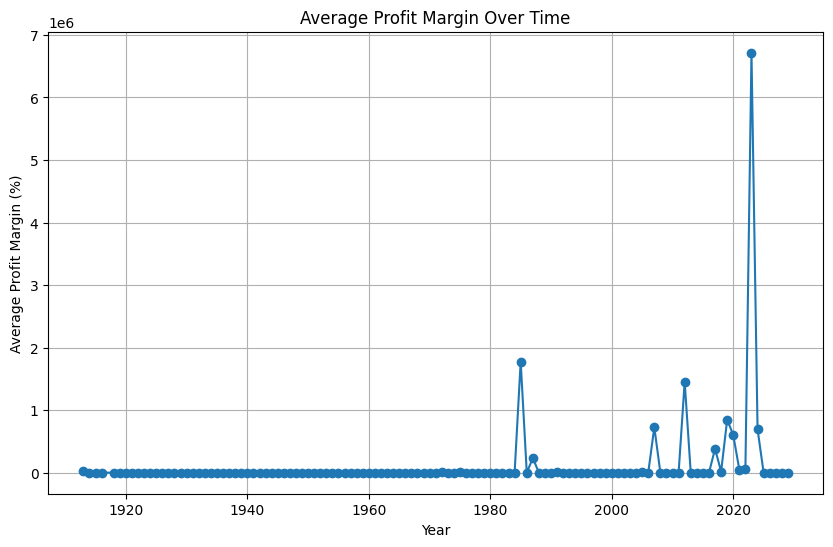

In [33]:
df_cleaned['release_year'] = pd.to_datetime(df_cleaned['release_date']).dt.year

profit_margin_over_time = df_cleaned.groupby('release_year').agg(
    avg_profit_margin=('profit_margin', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(profit_margin_over_time['release_year'], profit_margin_over_time['avg_profit_margin'], marker='o')
plt.title('Average Profit Margin Over Time')
plt.xlabel('Year')
plt.ylabel('Average Profit Margin (%)')
plt.grid()
plt.show()

5. How does the popularity score correlate with profit margins across different production companies?
- Investigating the relationship between a movie's popularity and its profitability can help assess whether a higher popularity score translates into better financial outcomes, guiding marketing and distribution strategies.

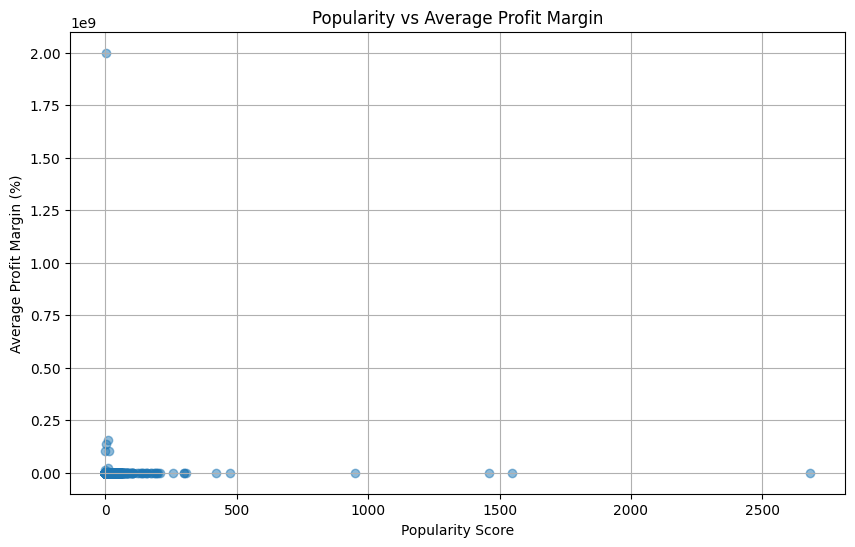

In [34]:
popularity_profit = df_cleaned.groupby('popularity').agg(
    avg_profit_margin=('profit_margin', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(popularity_profit['popularity'], popularity_profit['avg_profit_margin'], alpha=0.5)
plt.title('Popularity vs Average Profit Margin')
plt.xlabel('Popularity Score')
plt.ylabel('Average Profit Margin (%)')
plt.grid()
plt.show()